In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
coeffs_dict = readstring("./results_Tiergarten/coeffs_dict_Tiergarten.json")
coeffs_dict = JSON.parse(coeffs_dict)

Dict{String,Any} with 60 entries:
  "(6,1.0,1.0,1)"   => Any[1.0,0.0436092,0.156506,0.209675,0.14903,0.0570412,0.…
  "(5,1.0,0.1,1)"   => Any[1.0,0.00355396,0.259836,0.365125,0.20693,0.0446218]
  "(3,1.5,100.0,1)" => Any[1.0,0.000793536,0.000701875,0.000154364]
  "(4,1.5,0.01,1)"  => Any[1.0,-4.02985e-7,0.16543,0.545623,0.162279]
  "(5,1.0,1.0,1)"   => Any[1.0,0.048458,0.131427,0.129083,0.060096,0.0112885]
  "(6,1.5,10.0,1)"  => Any[1.0,0.0512617,0.114988,0.101833,0.0485877,0.0125529,…
  "(3,1.5,1.0,1)"   => Any[1.0,0.0759432,0.068141,0.0150864]
  "(6,1.0,10.0,1)"  => Any[1.0,0.00675051,0.0227137,0.0301728,0.0215945,0.00836…
  "(5,1.5,1.0,1)"   => Any[1.0,0.116515,0.279067,0.2014,0.0666703,0.00880031]
  "(3,0.5,0.01,1)"  => Any[1.0,0.00346971,0.424719,0.41192]
  "(3,0.5,1.0,1)"   => Any[1.0,0.00864547,0.0230411,0.0152364]
  "(5,1.0,0.01,1)"  => Any[1.0,0.00534872,-0.0877667,0.441445,0.473134,0.139059]
  "(4,1.0,1.0,1)"   => Any[1.0,0.0450034,0.0908547,0.0603457,0.0143964]
  "(6,1.5,1.0

In [3]:
deg = 3
c = 0.5
lam = 0.01

0.01

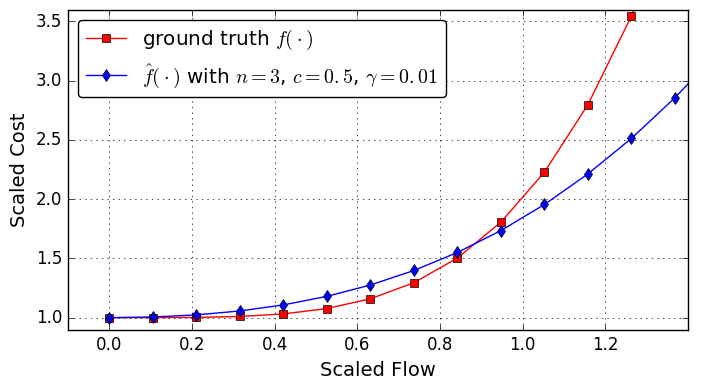

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'rm'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [4]:
using PyPlot

PyPlot.figure(figsize=(8, 4))

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict["($deg,$c,$lam,$iterN)"]

xs = linspace(0, 2, 20)
ys_true = map(x->polyEval(true_coeffs, x), xs)

ys = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1)
PyPlot.plot(xs, ys, "d-b", label=L"$\hat f(\cdot)$ with $n = 3$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=1)

legend(loc="upper left", fancybox="true", numpoints=1) 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 1.4);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Tiergarten/fitting_Tiergarten_multi_class_$(deg)_$(c)_$(lam).pdf")

In [5]:
deg_1 = 3
c_1 = 0.5
lam_1 = 0.01

deg_2 = 4
c_2 = 0.5
lam_2 = 0.01

deg_3 = 5
c_3 = 0.5
lam_3 = 0.01

deg_4 = 6
c_4 = 0.5
lam_4 = 0.01

0.01

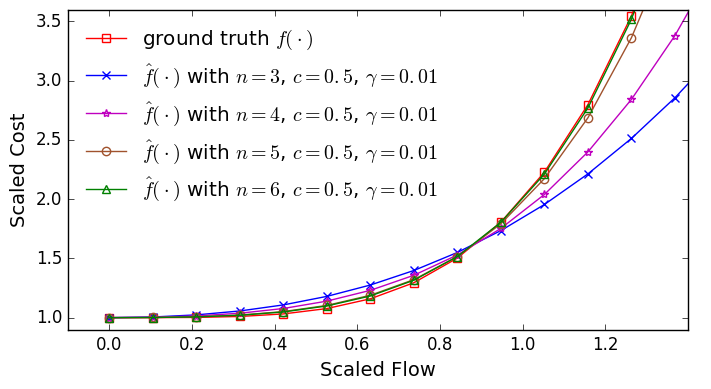

In [6]:
using PyPlot

PyPlot.figure(figsize=(8, 4))

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1,$iterN)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2,$iterN)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3,$iterN)"]
est_coeffs_4 = coeffs_dict["($deg_4,$c_4,$lam_4,$iterN)"]

xs_true = linspace(0, 2, 20)
xs_1 = linspace(0, 2, 20)
xs_2 = linspace(0, 2, 20)
xs_3 = linspace(0, 2, 20)
xs_4 = linspace(0, 2, 20)

ys_true = map(x->polyEval(true_coeffs, x), xs_true)

ys_1 = map(x->polyEval(est_coeffs_1, x), xs)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs)
ys_4 = map(x->polyEval(est_coeffs_4, x), xs)

PyPlot.plot(xs_true, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1,
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

PyPlot.plot(xs_1, ys_1, "x-b", label=L"$\hat f(\cdot)$ with $n = 3$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=1, markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

PyPlot.plot(xs_2, ys_2, "*-m", label=L"$\hat f(\cdot)$ with $n = 4$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=1, markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

PyPlot.plot(xs_3, ys_3, c="sienna", ls="-", marker="o", 
label=L"$\hat f(\cdot)$ with $n = 5$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=1, markerfacecolor="None", markeredgecolor="sienna", markeredgewidth=1)

PyPlot.plot(xs_4, ys_4, "^-g", label=L"$\hat f(\cdot)$ with $n = 6$, $c = 0.5$, $\gamma = 0.01$", 
linewidth=1, markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

legend(loc="upper left", fancybox="true", numpoints=1, frameon=false)
# plot(xs, ys, "--b")
# grid("on")
xlim(-0.1, 1.4);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Tiergarten/fitting_Tiergarten_multi_class_n.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"CDC17/images/"

savefig(dire * "fitting_Tiergarten_multi_class_n.pdf", dpi=300, bbox_inches="tight")

In [7]:
deg_1 = 5
c_1 = 0.5
lam_1 = 1.0

deg_2 = 5
c_2 = 1.0
lam_2 = 1.0

deg_3 = 5
c_3 = 1.5
lam_3 = 1.0

1.0

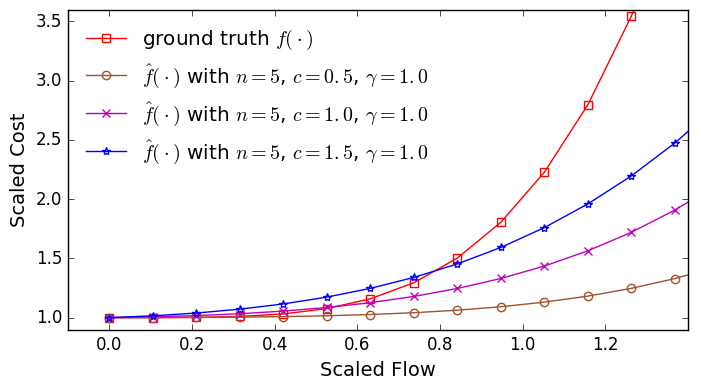

In [8]:
using PyPlot

PyPlot.figure(figsize=(8, 4))

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1,$iterN)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2,$iterN)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3,$iterN)"]

xs = linspace(0, 2, 20)
ys_true = map(x->polyEval(true_coeffs, x), xs)

ys_1 = map(x->polyEval(est_coeffs_1, x), xs)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs)

PyPlot.plot(xs, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1,
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

PyPlot.plot(xs, ys_1, c="sienna", ls="-", marker="o", 
label=L"$\hat f(\cdot)$ with $n = 5$, $c = 0.5$, $\gamma = 1.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="sienna", markeredgewidth=1)

PyPlot.plot(xs, ys_2, "x-m", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.0$, $\gamma = 1.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

PyPlot.plot(xs, ys_3, "*-b", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 1.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

legend(loc="upper left", fancybox="true", numpoints=1, frameon=false) 
# plot(xs, ys, "--b")
# grid("on")
xlim(-0.1, 1.4);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Tiergarten/fitting_Tiergarten_multi_class_c.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"CDC17/images/"

savefig(dire * "fitting_Tiergarten_multi_class_c.pdf", dpi=300, bbox_inches="tight")

In [9]:
deg_1 = 5
c_1 = 1.5
lam_1 = 0.01

deg_2 = 5
c_2 = 1.5
lam_2 = 0.1

deg_3 = 5
c_3 = 1.5
lam_3 = 1.0

deg_4 = 5
c_4 = 1.5
lam_4 = 10.0

deg_5 = 5
c_5 = 1.5
lam_5 = 100.0

100.0

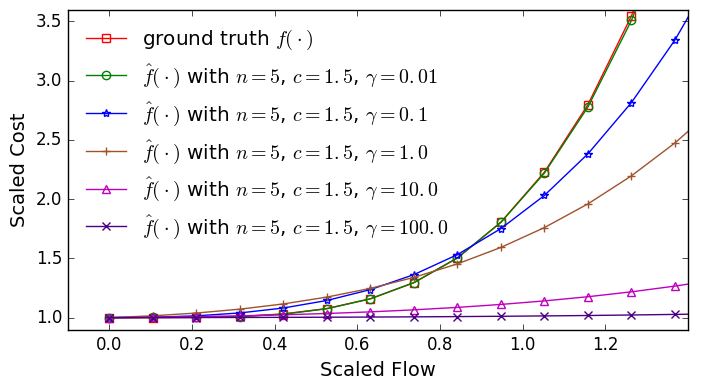

In [10]:
using PyPlot

PyPlot.figure(figsize=(8, 4))

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["($deg_1,$c_1,$lam_1,$iterN)"]
est_coeffs_2 = coeffs_dict["($deg_2,$c_2,$lam_2,$iterN)"]
est_coeffs_3 = coeffs_dict["($deg_3,$c_3,$lam_3,$iterN)"]
est_coeffs_4 = coeffs_dict["($deg_4,$c_4,$lam_4,$iterN)"]
est_coeffs_5 = coeffs_dict["($deg_5,$c_5,$lam_5,$iterN)"]


xs = linspace(0, 2, 20)
xs_true = linspace(0, 2, 20)
ys_true = map(x->polyEval(true_coeffs, x), xs_true)

ys_1 = map(x->polyEval(est_coeffs_1, x), xs)
ys_2 = map(x->polyEval(est_coeffs_2, x), xs)
ys_3 = map(x->polyEval(est_coeffs_3, x), xs)
ys_4 = map(x->polyEval(est_coeffs_4, x), xs)
ys_5 = map(x->polyEval(est_coeffs_5, x), xs)

PyPlot.plot(xs_true, ys_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1,
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

PyPlot.plot(xs, ys_1, "o-g", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 0.01$", 
linewidth=1, markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

PyPlot.plot(xs, ys_2, "*-b", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 0.1$", 
linewidth=1, markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

PyPlot.plot(xs, ys_3, c="sienna", ls="-", marker="+", 
label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 1.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="sienna", markeredgewidth=1)

PyPlot.plot(xs, ys_4, "^-m", label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 10.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

PyPlot.plot(xs, ys_5, c="indigo", ls="-", marker="x",
label=L"$\hat f(\cdot)$ with $n = 5$, $c = 1.5$, $\gamma = 100.0$", 
linewidth=1, markerfacecolor="None", markeredgecolor="indigo", markeredgewidth=1)

legend(loc="upper left", fancybox="true", numpoints=1, frameon=false) 
# plot(xs, ys, "--b")
# grid("on")
xlim(-0.1, 1.4);
ylim(0.9, 3.6);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results_Tiergarten/fitting_Tiergarten_multi_class_gamma.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"CDC17/images/"

savefig(dire * "fitting_Tiergarten_multi_class_gamma.pdf", dpi=300, bbox_inches="tight")